In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
from qp_planck.utilities import list_planck, detector_weights, load_RIMO

In [3]:
list_planck("100GHz")

['100-1a',
 '100-1b',
 '100-2a',
 '100-2b',
 '100-3a',
 '100-3b',
 '100-4a',
 '100-4b']

In [4]:
detector_weights

{'LFI27': 401640.0,
 'LFI28': 369000.0,
 'LFI24': 123720.0,
 'LFI25': 140490.0,
 'LFI26': 112330.0,
 'LFI18': 53650.0,
 'LFI19': 42141.0,
 'LFI20': 36579.0,
 'LFI21': 50355.0,
 'LFI22': 49363.0,
 'LFI23': 47966.0,
 '100-1': 763430.0,
 '100-2': 1266100.0,
 '100-3': 1063100.0,
 '100-4': 1053200.0,
 '143-1': 1640700.0,
 '143-2': 1857700.0,
 '143-3': 1643900.0,
 '143-4': 1445800.0,
 '143-5': 2763000.0,
 '143-6': 2694200.0,
 '143-7': 2859900.0,
 '217-1': 1105800.0,
 '217-2': 1026100.0,
 '217-3': 1095800.0,
 '217-4': 1059300.0,
 '217-5': 673180.0,
 '217-6': 710920.0,
 '217-7': 765760.0,
 '217-8': 712260.0,
 '353-1': 128290.0,
 '353-2': 134750.0,
 '353-3': 48067.0,
 '353-4': 42187.0,
 '353-5': 56914.0,
 '353-6': 25293.0,
 '353-7': 87730.0,
 '353-8': 74453.0,
 '545-1': 4475.5,
 '545-2': 5540.3,
 '545-4': 4321.0,
 '857-1': 6.8895,
 '857-2': 6.3108,
 '857-3': 6.5964,
 '857-4': 3.6785}

In [5]:
from qp_planck.qp_hmap2mat import *

In [6]:
hmap2mat?

Signature:
hmap2mat(
    RIMO,
    detsetpairs,
    blmfile,
    hitgrpfull,
    outdir,
    smax=6,
    spin_ref='Pxx',
    blm_ref='Dxx',
    nside=None,
    lmax=None,
    mmax=10,
    mask_file=None,
    mask_name=None,
    angle_shift=0,
    force_det=None,
    release=None,
    rhobeam='IMO',
    rhohit='IMO',
    pixel_undersampling=None,
    planet='',
    conserve_memory=True,
    overwrite=False,
    return_results=False,
)
Docstring:
Compute QuickPol effective beam matrices for one or more detector–set pairs.

This is the top–level driver that:
  • determines `nside` and `lmax` (if not provided),
  • loads beams from `blmfile`,
  • builds the hit matrices for the detector pair,
  • computes harmonic‐space beam transfer matrices (TT, TE, EE, BB, TB, EB),
  • applies sky masks if provided,
  • saves the full result (beam matrix, hit matrix, variance matrices, metadata)
    into a `.npz` file inside `outdir`,
  • and, optionally, returns all beam and hit matrices in memory.

Pa

In [7]:
rimofile = "../inputs/RIMOs/RIMO_HFI_npipe5v16_symmetrized.fits"
rimo = load_RIMO(rimofile)

Loading RIMO from ../inputs/RIMOs/RIMO_HFI_npipe5v16_symmetrized.fits
Load and broadcast RIMO: 0.008 s


In [8]:
rimo['100-1a'].psi_pol

np.float64(0.21718725535964634)

In [9]:
dets = [["100GHz", "100GHz"],
        ["100GHz", "143GHz"],
        ["143GHz", "143GHz"],
       ]
blms = "../inputs/beams/blm_{}.fits"
moments = "../inputs/polmoments_ns0128"

nside = 128
lmax = 2500

outdir = "./quickpol_output"

In [10]:
mat = hmap2mat(
    RIMO=rimo,
    detsetpairs=dets,
    blmfile=blms,
    hitgrpfull=moments,
    nside=nside,
    lmax=lmax,
    outdir=outdir,
    return_results=True,
)

0000 : rhobeam, rhohit:  IMO IMO
0000 : detectors:  [['100GHz', '100GHz'], ['100GHz', '143GHz'], ['143GHz', '143GHz']]
0000 : Writing into ./quickpol_output/beam_matrix_100GHzx100GHz_l2500_s6_A000_cmbfast_1_rbIMO_rhIMO.npz
0000 : detset= 100GHz
0000 :  ['100-1a', '100-1b', '100-2a', '100-2b', '100-3a', '100-3b', '100-4a', '100-4b'] [ 763430.  763430. 1266100. 1266100. 1063100. 1063100. 1053200. 1053200.] [ 0.40697785 -1.18808897  0.77256857 -0.79290512 -0.01163884 -1.5657909
 -0.40206635  1.18587265] 
0000 :  WARNING: Polarized Blm not found in ../inputs/beams/blm_100-1a.fits 
0000 : ../inputs/beams/blm_100-1a.fits
0000 : Beam normalisation:  100-1a (8.946212443325474e-06+0j) 1
0000 : ../inputs/beams/blm_{}.fits 100-1a 763430.0 True 0.9434659612964663
0000 :  WARNING: Polarized Blm not found in ../inputs/beams/blm_100-1b.fits 
0000 : ../inputs/beams/blm_100-1b.fits
0000 : Beam normalisation:  100-1b (8.991550869568794e-06+0j) 1
0000 : ../inputs/beams/blm_{}.fits 100-1b 763430.0 True 0.

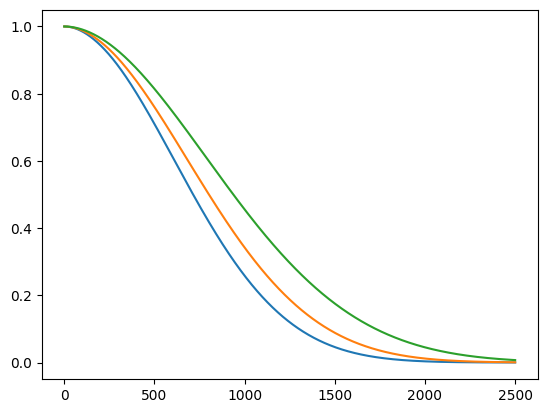

In [11]:
plt.plot()
plt.plot(mat['100GHz','100GHz']['beam_mat']['TT'][:,0,0])
plt.plot(mat['100GHz','143GHz']['beam_mat']['TT'][:,0,0])
plt.plot(mat['143GHz','143GHz']['beam_mat']['TT'][:,0,0])